<a href="https://colab.research.google.com/github/ihebakermi10/Prediction-ds/blob/main/production_linear_regression_tenserflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  iheb akermi 3GII SSE


#part 1: linear regression

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
df=pd.read_excel("/content/elec.xlsx")
df.head()

,date,Cumulative_solar_power,kWh electricity/day,Gas/day
0,2011-10-26,0.1,15.1,9.0
1,2011-10-27,10.2,7.4,9.2
2,2011-10-28,20.2,5.8,8.0
3,2011-10-29,29.6,4.9,6.6
4,2011-10-30,34.2,11.7,5.3


In [ ]:
def load_data(data, seq_len, column_index ):
    x = []
    y = []
    for i in range(seq_len, len(data)):
        x.append(data.iloc[i-seq_len : i, 2:3])
        y.append(data.iloc[i, 2:3])
    return np.array(x), np.array(y)



In [ ]:
# Predict 'kWh electricity/day'
training_size = int(len(df)*0.8)
x, y = load_data(df, 20, 2)

x_train1 = x[:training_size]
y_train1 = y[:training_size]
x_test1 = x[training_size:]
y_test1 = y[training_size:]

reg1 = LinearRegression().fit(x_train1.reshape(x_train1.shape[0], -1), y_train1)
y_pred1 = reg1.predict(x_test1.reshape(x_test1.shape[0], -1))

In [ ]:
# Predict 'Gas/day'
x, y = load_data(df, 20, 3)

x_train2 = x[:training_size]
y_train2 = y[:training_size]
x_test2 = x[training_size:]
y_test2 = y[training_size:]

reg2 = LinearRegression().fit(x_train2.reshape(x_train2.shape[0], -1), y_train2)
y_pred2 = reg2.predict(x_test2.reshape(x_test2.shape[0], -1))

In [ ]:
reg2

LinearRegression()

In [ ]:
reg1

LinearRegression()

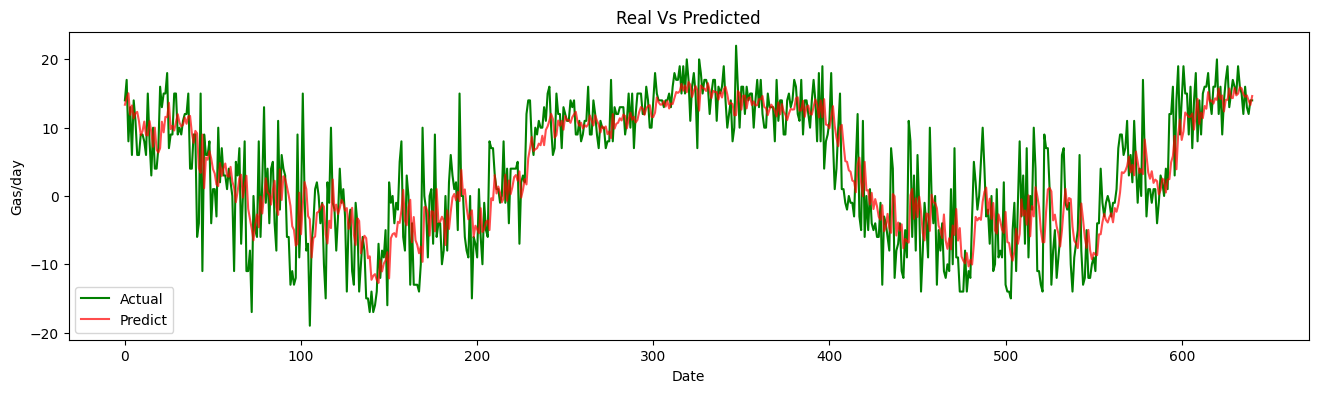

In [ ]:
plt.figure(figsize=(16,4))
plt.plot(y_test2, color='green',label='Actual')
plt.plot(y_pred2, alpha=0.7, color='red',label='Predict')
plt.title('Real Vs Predicted')
plt.xlabel('Date')
plt.ylabel('Gas/day')
plt.legend()
plt.show()



In [ ]:
rmse = np.sqrt(mean_squared_error(y_test1, y_pred1)).round(2)
# Exclude zero values
mask = y_test1 != 0
mape = np.round(np.mean(np.abs(y_test1[mask]-y_pred1[mask])/y_test1[mask])*100,2)

#mape = np.round(np.mean(np.abs(y_test-y_pred)/y_test)*100,2)

print('RMSE:', rmse)
print('MAPE:', mape)


RMSE: 5.66
MAPE: 7.12


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test2, y_pred2)).round(2)
# Exclude zero values
mask = y_test2 != 0
mape = np.round(np.mean(np.abs(y_test2[mask]-y_pred2[mask])/y_test2[mask])*100,2)

#mape = np.round(np.mean(np.abs(y_test-y_pred)/y_test)*100,2)

print('RMSE:', rmse)
print('MAPE:', mape)

RMSE: 5.66
MAPE: 7.12


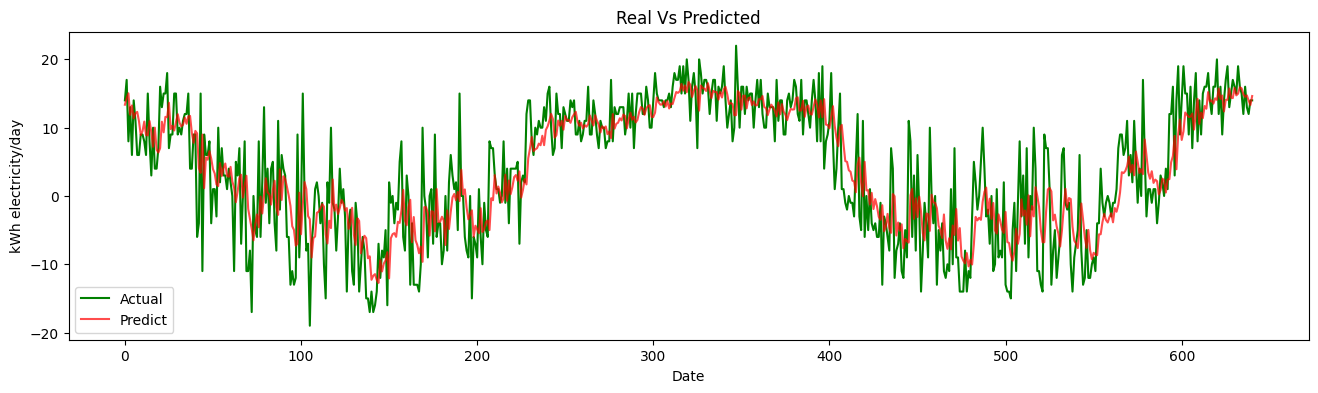

In [ ]:
plt.figure(figsize=(16,4))
plt.plot(y_test1, color='green',label='Actual')
plt.plot(y_pred1, alpha=0.7, color='red',label='Predict')
plt.title('Real Vs Predicted')
plt.xlabel('Date')
plt.ylabel('kWh electricity/day')
plt.legend()
plt.show()


#Part 2: Tensorflow

> Indented block



In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [ ]:




df=pd.read_excel("/content/elec.xlsx")

# Séparer les données en fonction des caractéristiques et de la variable cible

df['hour'] = df['date'].dt.hour
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['year'] = df['date'].dt.year

# Séparer les données en fonction des caractéristiques et de la variable cible
X = df[['hour', 'month', 'day', 'year']]
y1 = df[['Gas/day']]

y2 = df[['kWh electricity/day']]

# Concaténer les deux colonnes de y en une seule



# Créer un objet MinMaxScaler pour X et y
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Ajuster et transformer les données
X_scaled = scaler_X.fit_transform(X)
y1_scaled = scaler_y.fit_transform(y1)
y2_scaled = scaler_y.fit_transform(y2)



In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Assuming x_test1, y_test1 are your data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y1_scaled, test_size=0.2, random_state=42)

# Create the neural network model with adjustments
model = tf.keras.Sequential([
    tf.keras.layers.Dense(720, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

# Compile the model with an adjusted learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')

# Train the model with a higher number of epochs
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f'Loss on the test set: {loss}')


Epoch 1/200
67/67 [==============================] - 2s 14ms/step - loss: 0.0395 - val_loss: 0.0164
Epoch 2/200
67/67 [==============================] - 1s 12ms/step - loss: 0.0177 - val_loss: 0.0213
Epoch 3/200
67/67 [==============================] - 1s 12ms/step - loss: 0.0209 - val_loss: 0.0103
Epoch 4/200
67/67 [==============================] - 1s 12ms/step - loss: 0.0167 - val_loss: 0.0109
Epoch 5/200
67/67 [==============================] - 1s 13ms/step - loss: 0.0150 - val_loss: 0.0081
Epoch 6/200
67/67 [==============================] - 1s 20ms/step - loss: 0.0142 - val_loss: 0.0098
Epoch 7/200
67/67 [==============================] - 2s 37ms/step - loss: 0.0145 - val_loss: 0.0149
Epoch 8/200
67/67 [==============================] - 2s 31ms/step - loss: 0.0145 - val_loss: 0.0161
Epoch 9/200
67/67 [==============================] - 1s 21ms/step - loss: 0.0156 - val_loss: 0.0131
Epoch 10/200
67/67 [==============================] - 2s 23ms/step - loss: 0.0144 - val_loss: 0.0107

21/21 [==============================] - 0s 5ms/step


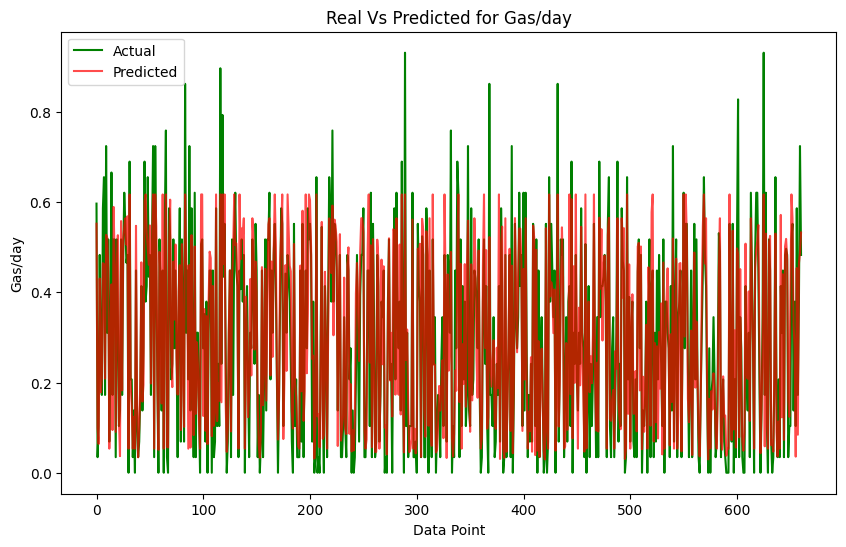

In [ ]:
# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)



# Convertir les prédictions en DataFrame pour faciliter l'accès aux colonnes
y_test_df = pd.DataFrame(y_test, columns=['Gas/day'])
y_pred_df = pd.DataFrame(y_pred, columns=['Gas/day'])

# Afficher les valeurs réelles et prédites
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(y_test_df['Gas/day'], color='green', label='Actual')
plt.plot(y_pred_df['Gas/day'], alpha=0.7, color='red', label='Predicted')
plt.title('Real Vs Predicted for Gas/day')
plt.xlabel('Data Point')
plt.ylabel('Gas/day')
plt.legend()

plt.show()




In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Assuming x_test1, y_test1 are your data
X1_train, X1_test, y1_train, y1_test = train_test_split(X_scaled, y2_scaled, test_size=0.2, random_state=42)

# Create the neural network model with adjustments
model = tf.keras.Sequential([
    tf.keras.layers.Dense(720, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

# Compile the model with an adjusted learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')

# Train the model with a higher number of epochs
model.fit(X1_train, y1_train, epochs=200, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss = model.evaluate(X1_test, y1_test)
print(f'Loss on the test set: {loss}')

NameError: name 'X_scaled' is not defined

21/21 [==============================] - 0s 3ms/step


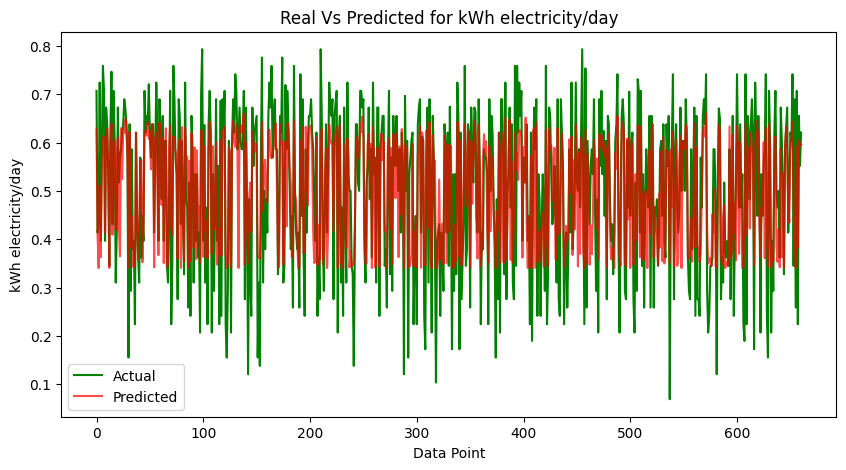

In [ ]:
# Faire des prédictions sur l'ensemble de test
y1_pred = model.predict(X1_test)



# Convertir les prédictions en DataFrame pour faciliter l'accès aux colonnes
y_test_df = pd.DataFrame(y1_test, columns=['kWh electricity/day'])
y_pred_df = pd.DataFrame(y1_pred, columns=['kWh electricity/day'])

# Afficher les valeurs réelles et prédites
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.plot(y_test_df['kWh electricity/day'], color='green', label='Actual')
plt.plot(y_pred_df['kWh electricity/day'], alpha=0.7, color='red', label='Predicted')
plt.title('Real Vs Predicted for kWh electricity/day')
plt.xlabel('Data Point')
plt.ylabel('kWh electricity/day')
plt.legend()

plt.show()


#MERCI